# BEP021 - common electrophysiology derivatives - community survey

This Jupyter Notebook contains the analysis for the BEP021 community survey.

Please feel free to submit suggestions for improvements.

dependency list:

- Python 3.6 or higher
- jupyter
- pandas
- matplotlib
- seaborn


# Settings

In [132]:
# Produce plots within the cells of this notebook
%matplotlib inline

# Import packages
import textwrap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
sns.set_style('whitegrid')

# Read data

Data was collected via Google Forms.
The data analyzed here was stripped of the following columns:
- timestamp
- "other comments"
- whether they would like to be included in future development
- email


In [178]:
df = pd.read_csv('community_survey_anonymized.csv')

In [181]:
old_columns = df.columns

# fix column names
columns = ['university', 'is_interested', 'modalities', 'annotations',
           'preprocessed', 'epochs', 'averaged', 'timefreq', 'decompositions',
           'head_models', 'source_models', 'source_timecourses', 'connectivity',
           'other', 'most_time_consuming', 'used_software']
df.columns = columns

# Where are respondents from?

In [138]:
# Overall number of respondents
df.shape[0]

158

In [139]:
# number of unique "locations"
df['university'].nunique()

138

- There were 158 responses from roughly 138 different institutions
- (maybe a few institutions less, because we don't correct for different spellings of the same location)

# How many are generally interested in BIDS electrophys derivatives?

In [140]:
print('n={} unique responses'.format(df['is_interested'].nunique()))

# List different kinds of responses
for response in df['is_interested'].unique():
    print('- "{}"'.format(response))

n=2 unique responses
- "Yes"
- "Yes and no. I mean, it seems well-intended, but one size fits all for M/EEG seems impractical to me. Unlike fMRI where a specific preprocessing is mandatory, for M/EEG there is no ONE way of doing things."


All except one person are interested, one person had a more reserved opinion.

# Modalities used by respondents

In [141]:
# Split modalities column into three modalities
df['EEG'] = False
df['MEG'] = False
df['iEEG'] = False

modalities = ['EEG', 'MEG', 'iEEG']
for row in df.itertuples():
    for modality in modalities:
        if modality in row.modalities:
            df.loc[row.Index, modality] = True

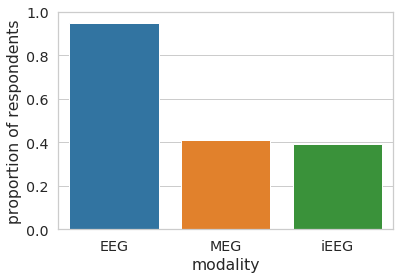

In [142]:
with sns.plotting_context('notebook', font_scale=1.3):
    fig, ax = plt.subplots()
    sns.barplot(x='variable', y='value', data=df[modalities].melt(), ax=ax, ci=None)
    _ = ax.set(xlabel='modality', ylabel='proportion of respondents', ylim=((0, 1)))


Note that several respondents use more than one modality

In [168]:
tmp = df[modalities].sum(axis=1).value_counts()
for val, nmods in zip(tmp, tmp.index):
    print('{} respondents used {} different modalities'.format(val, nmods))

70 respondents used 1 different modalities
57 respondents used 2 different modalities
31 respondents used 3 different modalities


# What kind of derivatives are most sought after?

## prepare some reusable code

In [241]:
# How the levels of response were in the survey
levels = dict(enumerate(['Likely will never look at', 'Useful', 'Must have']))

# how to plot the xlabels
xlabels = ['\n'.join(i.split()) for i in list(levels.values())]


In [245]:
def plot_column_summary(column):
    # prepare data in tidy format
    str2int_map = {val: key for key,val in levels.items()}
    tmp = df[column].map(str2int_map)
    tmp = pd.get_dummies(tmp).melt()
    
    # prepare title
    title = old_columns[columns.index(column)]
    wrapper = textwrap.TextWrapper(width=50) 
    word_list = wrapper.wrap(text=title) 
    title = '\n'.join(word_list)
    
    # plot
    with sns.plotting_context('notebook', font_scale=1.3):
        fig, ax = plt.subplots()
        sns.barplot(x='variable', y='value', data=tmp, ax=ax, ci=None)
        _ = ax.set(xlabel='answer', ylabel='proportion of respondents',
                   ylim=((0, 1)), xticklabels=labels,
                   title=title)
    return fig, ax

## Now plot for each kind of derivative

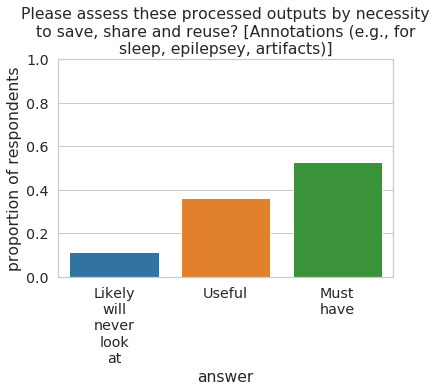

In [246]:
fig, ax = plot_column_summary('annotations')

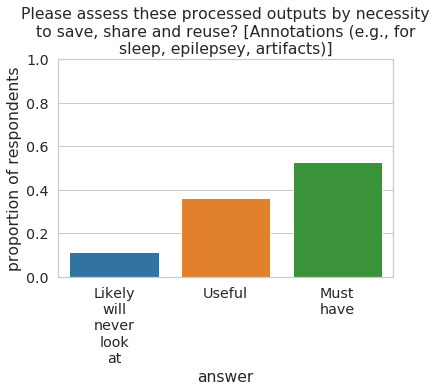

In [247]:
fig, ax = plot_column_summary('annotations')

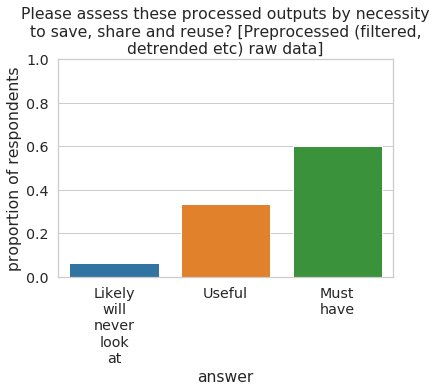

In [248]:
fig, ax = plot_column_summary('preprocessed')

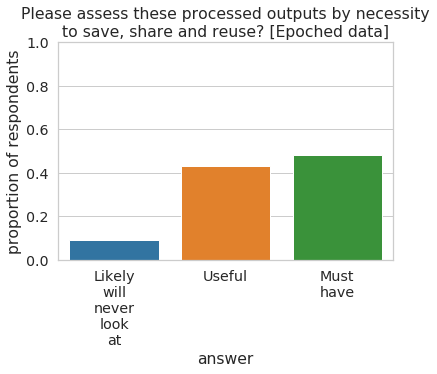

In [249]:
fig, ax = plot_column_summary('epochs')

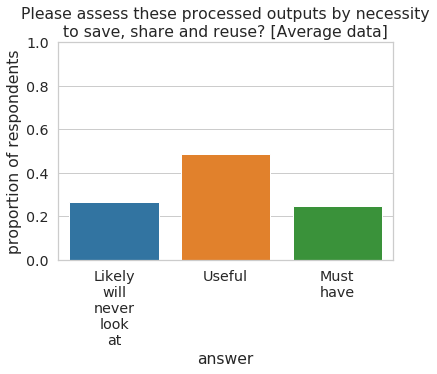

In [250]:
fig, ax = plot_column_summary('averaged')

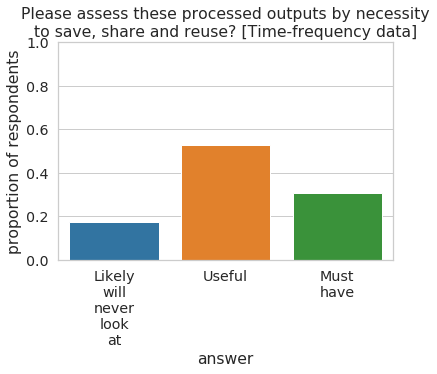

In [251]:
fig, ax = plot_column_summary('timefreq')

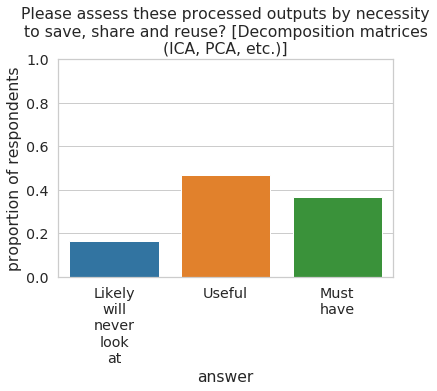

In [252]:
fig, ax = plot_column_summary('decompositions')

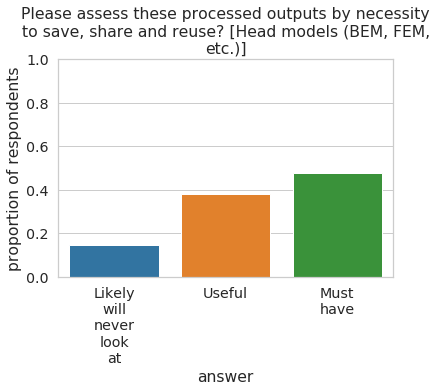

In [253]:
fig, ax = plot_column_summary('head_models')

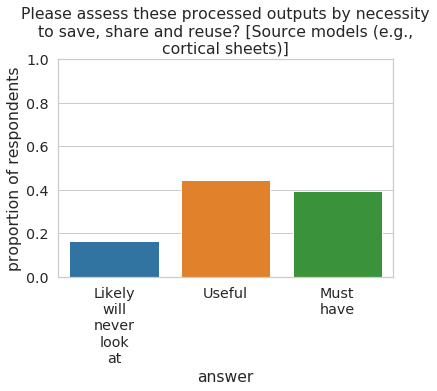

In [254]:
fig, ax = plot_column_summary('source_models')

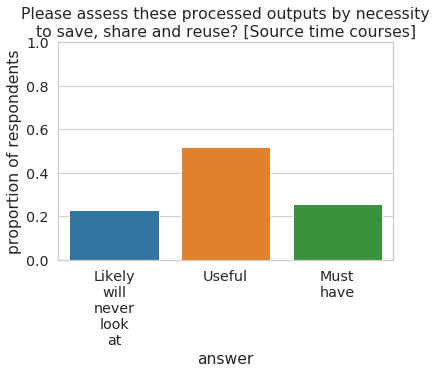

In [255]:
fig, ax = plot_column_summary('source_timecourses')

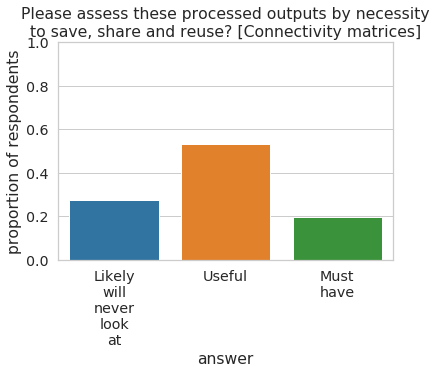

In [256]:
fig, ax = plot_column_summary('connectivity')

# What were some other kinds of derivatives?

In [261]:
# how many "other" derivatives are proposed?
n_other = df['other'].dropna().nunique()

In [267]:
for other in df['other'].dropna().unique():
    print('- {}\n'.format(other))

- Forward models, Cortical parcellations

- Single-trial behavioral markers

- Clinical characteristics for patient population such as disease severity, medication, etc.

- statistical models

- Transformation matrices (to normalized space), sturcture of preprocessing settings (used filters, methods etc.)

- individual structural connectomes

- standardized parameters that led to processed outputs

- electrode locations, events, annotations for ica, 

- no

- eye-tracking data, metadata about conditions

- FFTs

- scripts for processing pipelines, notes on sessions that required manual input

- Statistics and study design; How the data was derived

- Standardized process (PREP, clean_rawdata) like Automagic toolbox

- Events and Demographics

- I would just like to note that there are dependencies here (eg. if there source models, then I feel head models are a necessity, or if there is averaged data, I feel prepreoceesed and epoched data are a necessity)

- Preprocessed stimuli that ar

# Which kinds of derivatives were judged most time consuming?

In [270]:
for mtc in df['most_time_consuming'].dropna().unique():
    print('- {}\n'.format(mtc))

- preprocessing data for ICA

- Cleaned epoch data

- narrow-band filtered raw data; ICA'd raw data

- Preprocessing epoched data 

- Time-frequency data.

- Annotations

- preprocessed raw data, source time courses

- Average data (ERPs)

- Raw, Epoched, TF

- Connectivity matrices

- continuous filtered ica cleaned channel removed interpolated

- depends...

- epoched data

- Evoked and induced responses.

- Information about experimental setting

- preprocessed raw data and epoched data

- Preprocessing pipeline

- source extracted time courses, pre-processed and epoched data

- depends on the research question

- Reverse correlation results, stored as 4D matrices

- Epoched

- Preprocessed data

- Processed and timefreq data

- T-F data

- Source models

- phase/relative phase dynamics

- Connectivity

- head-sensor alignment, preprocessing

- Epoched data

- This depends strongly on the experiment. However, Time-frequency, epoched, preprocessed raw, and average data are most commo

# Which software suites are used in general?

In [297]:
# Split software column into the "main" softwares that were in the question
# i.e., ignore "other" for now
softwares = ['MNE-Python', 'EEGLab', 'Brainstorm', 'FieldTrip', 'SPM',
             'Nutmeg', 'Curry', 'Besa', 'BrainVision Analyzer',
             'Your own custom scripts']
for software in softwares:
    df[software] = False

for row in df.itertuples():
    for software in softwares:
        if software in row.used_software:
            df.loc[row.Index, software] = True

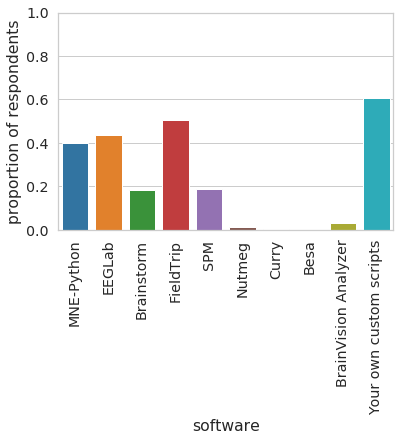

In [304]:
with sns.plotting_context('notebook', font_scale=1.3):
    fig, ax = plt.subplots()
    sns.barplot(x='variable', y='value', data=df[softwares].melt(), ax=ax, ci=None)
    _ = ax.set(xlabel='software', ylabel='proportion of respondents', ylim=((0, 1)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Note that several respondents use more than one software

In [300]:
tmp = df[softwares].sum(axis=1).value_counts()
for val, nsofts in zip(tmp, tmp.index):
    print('{} respondents used {} different softwares'.format(val, nsofts))

48 respondents used 2 different softwares
43 respondents used 3 different softwares
39 respondents used 1 different softwares
20 respondents used 4 different softwares
5 respondents used 5 different softwares
2 respondents used 0 different softwares
1 respondents used 6 different softwares
